In [ ]:
import numpy as np
import sympy
from matplotlib import pyplot as plt
import scipy
import scipy.optimize
import scipy.integrate

## Assumptions:

1. Constant liquid hold up on each plate 
2. Constant liquid flow in each of the three sections of the column
3. Constant vapour flow in the column
4. No vapour holdup in the column
5. Constant hold up in reboiler and condenser
6. Constant relative volatility

In [ ]:
def vol(xi):
    return (α*xi)/(1+(α-1)*xi)

In [53]:
def mod(t,var):
    
    x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11 = var
    
    if t <50:
        reflux = 0.6
    else:
        reflux = 18
    
    D = D_F_ratio*(F3+F7)
    L1 = reflux*D
    V = L1 + D
    L2 = F3 + L1
    L3 = F7 + L2

    
    y0 = vol(x0)
    y1 = vol(x1)
    y2 = vol(x2)
    y3 = vol(x3)
    y4 = vol(x4)
    y5 = vol(x5)
    y6 = vol(x6)
    y7 = vol(x7)
    y8 = vol(x8)
    y9 = vol(x9)
    y10 = vol(x10)
    y11 = vol(x11)
    
    # Condenser composition
    dx0dt = (1/m_cond)*(y1*V - V*x0)
    
    dx1dt = (1/m_tray)*(V*(y2-y1) + L1*(x0-x1))
    dx2dt = (1/m_tray)*(V*(y3-y2) + L1*(x1-x2))
    
    # Feed plate 3
    dx3dt = (1/m_tray)*(V*(y4-y3) + L1*x2 - L2*x3 + xF*F3)
    
    dx4dt = (1/m_tray)*(V*(y5-y4) + L2*(x3-x4))
    dx5dt = (1/m_tray)*(V*(y6-y5) + L2*(x4-x5))
    dx6dt = (1/m_tray)*(V*(y7-y6) + L2*(x5-x6))
    
    # Feed plate 7
    dx7dt = (1/m_tray)*(V*(y8-y7) + L2*x6 - L3*x7 + xF*F7)
    
    dx8dt = (1/m_tray)*(V*(y9-y8) + L3*(x7-x8))
    dx9dt = (1/m_tray)*(V*(y10-y9) + L3*(x8-x9))
    dx10dt = (1/m_tray)*(V*(y11-y10) + L3*(x9-x10))
    
    # Reboiler composition
    dx11dt = (1/m_rebl)*(L3*x10 - x11*(L3 - V) - V*y11)
    
    
    return [dx0dt, dx1dt, dx2dt, dx3dt, dx4dt, dx5dt, dx6dt, dx7dt, dx8dt, dx9dt, dx10dt, dx11dt]

## Inputs to calculate intial state

### Input variables

1. $F_3$ - Feed flow rate on plate 3
2. $F_7$ - Feed flow rate on plate 7
3. $x_F$ - Feed liquid composition
4. $Rr$ - Reflux ratio
5. $D_F$ - Distillate to feed ratio

### Parameters

1. $\alpha$ - Relative volatility
2. $m_{tray}$ - holdup on each tray
2. $m_{cond}$ - holdup in the total condenser
2. $m_{rebl}$ - holdup in the partial reboiler

In [54]:
init = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

F3 = 1 # Feed on plate 3
F7 = 0 # Feed on Plate 7
xF = 0.25 # mole fraction in feed
reflux = 0.6 # reflux ratio
m_cond = 0.15 # holdup in condenser
m_tray = 0.2 # holdup on each tray
m_rebl = 0.45 # holdup in reboiler
α = 1.6 # relative volatility
D_F_ratio = 0.4 # Feed to distillate ratio

In [55]:
tspan = (0, 100)
t = np.linspace( *tspan, 100)
initial_run = scipy.integrate.solve_ivp(mod, tspan, init, t_eval=t)

0.2173584905660379
0.21326191978008308
0.20786630448537374
0.20377332523713126
0.18520547263961343
0.18416278329318683
0.18091290203590443
0.1778475869578809
0.16785084221635505
0.1647257224907973
0.14988384867870685
0.14838915678883263
0.1478074252378219
0.1464481809864803
0.14273767843802854
0.1425780934635911
0.13883232297174086
0.13415220263729563
0.13532250822921885
0.1419373645703
0.14337214230524198
0.14513898518239238
0.14775589941069117
0.13975354776836407
0.1411294141136867
0.15442782791527526
0.157994307103173
0.15946271685881014
0.16107939544840763
0.15326404600077614
0.15226403886340908
0.1650181218698769
0.1654414456052007
0.16456940689726957
0.15951094617311684
0.15791757335978726
0.15536293636567167
0.15600185094985397
0.16538921856872596
0.16479776557583722
0.16121402992396303
0.1601614904801696
0.15843080231439027
0.1586694867681334
0.15593043505838142
0.15414119464388643
0.1457387210890456
0.14553459234502297
0.1435955799208368
0.1410290488242527
0.1565522500749785
0

0.00027941319316345436
0.0002746264509253157
0.00031401764895059675
0.0004600968838371541
0.0005413249408570131
0.00024473706917160776
0.00025109037938582845
0.00024505009883194856
0.00032452071204576904
0.0005796559057417532
0.0007227904634347453
0.00020875066550278082
0.0002501094184178173
0.0002462051940788079
0.00029186420483107156
0.0004333417883980081
0.0004957831867798598
0.00022989902982957963
0.0002320755928027681
0.0002288141287272912
0.0002571879070341806
0.00035467507795927666
0.00039912421830249717
0.00021293612613641305
0.00021391367604077044
0.00021057476378446202
0.00023745171955321295
0.0003358113085386953
0.0003867055485876995
0.0001914902836164245
0.00019432051316455498
0.00019038962805528747
0.0002342485080856586
0.0003812921729207108
0.00046299410502640786
0.00016665405994653604
0.00017443166463682047
0.0001692626850058332
0.00025015099389347206
0.0004986200838904183
0.0006374891890637002
0.00013926104623362967
0.00017329132466696134
0.00017001355381925562
0.000218

-1.8869350889202017e-06
-5.76208860773401e-06
9.182317185052469e-05
0.00036719793909475074
0.0005246455857144117
-2.7596576604264438e-05
-3.8775652592507965e-06
-5.745256365467337e-06
5.1605538135361215e-05
0.00019803007236696146
0.00026352826627255393
-7.5671029753365815e-06
-1.316587583769883e-06
-2.6235255249732843e-06
3.527700831451597e-05
0.00013391459080673113
0.00017992955194815846
-4.978838717232629e-06
-1.5486526505625875e-08
-1.4122805628661677e-06
3.480977980456028e-05
0.00013426930925467911
0.0001870795575675821
-7.254278363196439e-06
-5.350048507916465e-07
-2.6754930223156967e-06
5.125256393401223e-05
0.00020302416937475107
0.0002890795582558929
-1.4376970328688898e-05
-2.635002753770266e-06
-6.349117852577635e-06
8.770291200314399e-05
0.0003521858818211765
0.0005021598758259138
-2.662280312833628e-05
-4.470392576486996e-06
-6.339893734811734e-06
5.07631339741188e-05
0.00019691792002674013
0.0002627340907594237
-8.37270610768807e-06
-2.035417389079086e-06
-3.36553212076928

-3.7343792732199197e-06
-5.017367890047808e-06
3.2869906789005185e-05
0.0001312104144890469
0.0001770646640627168
-7.213957273396096e-06
-2.2308669467285824e-06
-3.604096071215442e-06
3.259164458350543e-05
0.0001317527528825006
0.00018444322812246247
-9.308979043165522e-06
-2.5596086905554927e-06
-4.683602873312154e-06
4.9361316733683345e-05
0.0002012864728081117
0.00028754019595197044
-1.6320714852543126e-05
-4.494118723460025e-06
-8.215200864765867e-06
8.647965378435116e-05
0.00035266679710506865
0.0005037934457959489
-2.859386585692588e-05
-6.359273868605797e-06
-8.213709454067224e-06
4.902109793462432e-05
0.00019527291977331868
0.0002610715963861458
-1.0107276966116649e-05
-3.752429843517646e-06
-5.064401407128827e-06
3.3499356301887793e-05
0.0001337728986583464
0.00018072095674244912
-7.412238381965253e-06
-2.306217522507481e-06
-3.704191863980929e-06
3.321732586732592e-05
0.000134242081168597
0.0001877566755274322
-9.428535509004021e-06
-2.62812158813297e-06
-4.740878249975822e-0

-1.0569136322432135e-05
-3.824219089546925e-06
-5.293178723109193e-06
3.689116202780045e-05
0.00014759987709759653
0.00020057054242461625
-8.517969134850627e-06
-2.7243994201360997e-06
-4.259822685333722e-06
3.671049471224801e-05
0.00014812810849769895
0.00020624851287472565
-1.009743279101194e-05
-3.00503443129152e-06
-5.063195438470558e-06
4.838646404881075e-05
0.00019627249007614367
0.0002768587939698068
-1.4621777730446558e-05
-4.351392816070998e-06
-7.331401853013139e-06
7.0065492443853e-05
0.0002842047729826695
0.0004008948497398931
-2.1167023797804184e-05
-5.454603894487302e-06
-7.336436562699333e-06
4.811751861918031e-05
0.00019216559019522944
0.0002594525043786433
-1.062059028130354e-05
-3.831346125545329e-06
-5.318257906283819e-06
3.728087631641823e-05
0.00014918781352809182
0.00020285580169051207
-8.646393195865798e-06
-2.7728987946525527e-06
-4.32387265547618e-06
3.711004518939613e-05
0.00014971186907926834
0.0002083505176268356
-1.0170856715729926e-05
-3.0466897253204435e-

-0.00979494620074443
-0.011108503383739551
-0.006302298269833528
-0.0066551791873574
-0.0067432226113458196
-0.008034322226701345
-0.010039576124386922
-0.011066510534849527
-0.007471312739220082
-0.007802738702243536
-0.007887856554956349
-0.009145264559092444
-0.011158450516652135
-0.012280666034095352
-0.008553047378404937
-0.008897252848919143
-0.008966129029464772
-0.01043636895096493
-0.013156390084662444
-0.014714195348635902
-0.009514666650745815
-0.009902692663086299
-0.00994322961443454
-0.011852771244130386
-0.015916025163148127
-0.018207851799279716
-0.010334903061058517
-0.009855968741134074
-0.00990787751542636
-0.011313118287249088
-0.013930590883841631
-0.015197343986124897
-0.01044161101579159
-0.01072477339441491
-0.010779210025665028
-0.011904412007689066
-0.0138840279880507
-0.01487916621909946
-0.011274830304757918
-0.01153731373428002
-0.011588896999240225
-0.01268252572034001
-0.014671856135783184
-0.01575963269271341
-0.012024151599270283
-0.01230149604853755
-0

-0.017527050468597594
-0.017611832056629122
-0.017578168663222964
-0.018248583936273377
-0.02016638183805005
-0.021169645361194256
-0.017424275875009464
-0.017535575126596353
-0.01749037438308676
-0.018425518931787604
-0.021125210322286612
-0.022615907582460203
-0.017251066610016373
-0.0174330651324676
-0.017366541490571784
-0.018848633030484528
-0.023072546959207095
-0.025407949788605798
-0.017020774119984594
-0.017409768783386664
-0.017369325990118277
-0.018353658409058227
-0.020971769852587606
-0.022171932888372936
-0.01727441053875604
-0.017380854020571473
-0.01734846634421435
-0.01805651030705846
-0.019990482436078594
-0.020904518300302044
-0.01724878524597647
-0.01733509040914072
-0.01730075901408057
-0.017982425833806086
-0.019932392016338934
-0.020950383268066496
-0.01714454298005208
-0.017256593573780066
-0.017211167809936256
-0.018148094047851043
-0.02085075168998548
-0.022336336272861246
-0.01697371687768623
-0.017153141998994908
-0.017087611863981778
-0.018542101479575024
-

-0.013760174606064862
-0.013712871668071596
-0.014698999470095231
-0.017551186479251395
-0.019142159898499028
-0.013455062638989546
-0.01365401899287022
-0.013581364890757897
-0.015218045901116048
-0.019888535582216114
-0.02249704310796593
-0.013192194269458687
-0.013626172085749271
-0.01358439651175066
-0.014628171127413955
-0.017386547908688026
-0.018640126373158004
-0.013494738065447839
-0.01360554545264255
-0.01357296800398089
-0.014300620293005533
-0.016277987580680296
-0.017207513695674713
-0.013476932657840262
-0.013565209024489397
-0.01353057887274763
-0.014228507782831912
-0.016222289903472152
-0.017267819323834033
-0.013371901486737652
-0.013489300463109071
-0.01344215175472267
-0.014430759599832754
-0.017282517429263088
-0.018865011603133773
-0.013189599973231955
-0.013385676028541127
-0.013314759786986485
-0.014914890730543345
-0.01947239459581122
-0.02200446514505572
-0.01294159716271892
-0.013359481488948907
-0.013317585084049455
-0.014360774597162637
-0.0171227155709038


-0.011091693852141779
-0.01570283706918474
-0.018250645399587505
-0.009103446362222675
-0.009505027615877756
-0.00946290753791009
-0.01055471597323295
-0.013432129628393834
-0.014754437818987517
-0.00937371071787041
-0.009495599928251627
-0.00946238595608051
-0.010254605951764972
-0.012388259122223152
-0.013399218400724777
-0.00936916623986169
-0.009469603549655167
-0.00943456842829112
-0.01019889152488555
-0.012348746902410095
-0.01347231682331677
-0.009281794701306486
-0.009410471213347668
-0.009363615191292734
-0.010405018696909945
-0.013369241625908284
-0.0149984249652609
-0.009124424037061374
-0.009325929157721902
-0.00925752648647915
-0.010856313077892329
-0.01536893776516261
-0.01785110983752484
-0.00891357637692991
-0.009301593343937025
-0.009259409154515435
-0.010350153771708412
-0.0132291054400883
-0.01455761817571381
-0.00916757903657602
-0.00929087326162185
-0.009257286997807295
-0.010060654483113515
-0.012224950742870297
-0.013253229076871284
-0.009162273717494193
-0.00926

-0.006585036099231445
-0.006550094071139749
-0.007358288245497373
-0.009607479982580713
-0.01078107221463398
-0.006403481061341884
-0.006540112562933113
-0.006493722215541453
-0.007571933350032367
-0.010612807412690255
-0.012275877454393699
-0.006264542565143453
-0.006471032911292696
-0.006404198877950999
-0.008012720157536773
-0.012523619478663761
-0.014991965182744593
-0.006077914309129777
-0.006447524693668309
-0.006405456154160069
-0.007530108645390499
-0.010488112594693177
-0.011861024832467612
-0.006316918131125486
-0.006447898397574647
-0.006414277049895389
-0.007259732036158558
-0.00952166666860895
-0.010600845999958846
-0.006323643979531113
-0.006434510429217019
-0.0063992771527369525
-0.007218875269625613
-0.009496450114928242
-0.010682836171647855
-0.006252850415039054
-0.006390552164869945
-0.006344327352323376
-0.0074234205841309615
-0.010460925903560774
-0.01211572316790921
-0.006119415145947235
-0.006323545703944926
-0.006258034178869091
-0.00783851242767734
-0.012263738

-0.004838634057401
-0.00480627342444843
-0.005648383313131926
-0.007886053392454073
-0.00894806372671179
-0.004725492838767073
-0.004835897682854788
-0.004801822857185556
-0.005615260193222819
-0.007868978670207602
-0.009048303851315609
-0.004660076681920108
-0.004800088276321428
-0.004753775448188928
-0.005856514842358015
-0.008959350894652829
-0.010665899215176466
-0.004522542120527126
-0.004738434817550541
-0.004669673098671723
-0.006352931111640222
-0.011068311971094147
-0.013662804815150292
-0.004329462173983482
-0.004712451770328604
-0.004670672190319655
-0.005823239073444361
-0.008836983034014406
-0.010229759923170434
-0.0045907433862465066
-0.0047245671464205925
-0.0046918101021020675
-0.005544771844766909
-0.007812779562730299
-0.008892148278949463
-0.00460896595852726
-0.004721477015987574
-0.0046870718835260545
-0.0055125294547823485
-0.00779637534380484
-0.008989217089349449
-0.004545404527078745
-0.004686478232613922
-0.004640342743904569
-0.005743350138912954
-0.008840776

-0.0035794836839050013
-0.0035329849184861928
-0.004655269908481567
-0.007817930233896913
-0.009578780132001679
-0.0032916669995290233
-0.0035208123826713233
-0.003447578076780644
-0.005256853449543779
-0.010336730767187182
-0.013165932956310893
-0.0030700140592128853
-0.003489870659259727
-0.0034484600374244207
-0.004628161769530219
-0.007689767452809804
-0.009089818682953185
-0.00338082691797581
-0.0035148302487246026
-0.003483473203444258
-0.004324412780315849
-0.006546372177590835
-0.007596894849524935
-0.003410575828445654
-0.003520995323616679
-0.0034878637669244483
-0.004298099983313838
-0.00653633501213354
-0.0077115611912859094
-0.003350309690925239
-0.003492393851202517
-0.0034460945936013827
-0.004568062397461622
-0.00772269091308786
-0.009469989066281197
-0.0032105546498032806
-0.0034358773045658117
-0.0033646117572772027
-0.005129785117521379
-0.010075826535788462
-0.012816201975590266
-0.003004480866349487
-0.0034068852234980795
-0.0033654094595251633
-0.00454150838847885

-0.0020602474514023568
-0.0032351650708524935
-0.006306817974716476
-0.007745328685656953
-0.0019786393372100974
-0.0021218837821675627
-0.0020884927417993047
-0.002999817773255605
-0.0054117987111723664
-0.006570020939407803
-0.0020063361697945465
-0.0021305826134465633
-0.002095798493642794
-0.0029829443440831938
-0.005409744878045094
-0.006670816262352257
-0.0019611439368757053
-0.0021111533561620397
-0.002066050195986454
-0.003198979165818609
-0.006343034585404676
-0.00804351180319074
-0.0018591986579075126
-0.002070674114692158
-0.0020080043077896903
-0.0035993830789848857
-0.008008353737067136
-0.010393338432391394
-0.0017219308150906443
-0.002019593623684794
-0.0019322851892174717
-0.004166560332024005
-0.010349444706421925
-0.013694376853183126
-0.0015350689673650684
-0.0019727154184974913
-0.001930489029244124
-0.00328727350810946
-0.006692439477665365
-0.008151109626316119
-0.0019216828119894558
-0.0020516962184657928
-0.0020264817701705815
-0.0027717417740191763
-0.004682272

-0.0011288537862460166
-0.001083415878226172
-0.0022340993632023283
-0.005438863403171013
-0.007200070092234038
-0.0008626590246526197
-0.0010891515909901748
-0.0010210421215539611
-0.0027581046227472448
-0.007590795015352351
-0.010246891433081847
-0.0006909675127827105
-0.0010623486330274545
-0.001021220884999489
-0.0022209074086632086
-0.005334829887750914
-0.006777429491264068
-0.0009518593440146125
-0.00109469477382144
-0.0010627964135482653
-0.0019580291093627506
-0.004313273285418973
-0.005436618966043009
-0.000990979579806132
-0.0011123469378423088
-0.0010789141841864118
-0.001946597422115559
-0.004317536331317484
-0.0055563528084334735
-0.0009481439023772964
-0.001098684500628148
-0.0010534102592056154
-0.002203169452291339
-0.005399735999827016
-0.007148914518365265
-0.0008373053903376615
-0.0010605659665567184
-0.0009940138858569962
-0.0026953751981473317
-0.007420756370303631
-0.010006739127188524
-0.000677137183734781
-0.001035340772534236
-0.0009941654366348493
-0.00219029

-0.003955392633407939
-0.005065420859432143
-0.000665174631150715
-0.0007853885336454407
-0.0007524456435585118
-0.0016124446659008622
-0.003961660367514479
-0.005191609912766164
-0.0006230250232045857
-0.0007736318114185774
-0.000728290553144717
-0.0018836414064201299
-0.005098311983508334
-0.006865041557571061
-0.0005085341888152092
-0.0007361552056650567
-0.0006680837574712939
-0.002411294773393043
-0.007257996752940699
-0.009921833162985413
-0.000338743071921499
-0.000709228376898352
-0.0006681802870585803
-0.0018725058612230803
-0.004996031176579171
-0.006443260198653415
-0.0006000188977317578
-0.000743712384843794
-0.0007119227556747395
-0.0016109772798481952
-0.003973738165553206
-0.005100826811125596
-0.0006413291163790784
-0.0007635197413750443
-0.0007302054598194256
-0.0016016815738121675
-0.00398013786349812
-0.005222997411333807
-0.0006005930726615816
-0.0007520446509682681
-0.0007068647736829803
-0.001861169888807505
-0.005067367451747629
-0.006821888532044795
-0.000491748

-0.00036111956841722304
-0.0004875507565967515
-0.000453631402083469
-0.0013489556534551639
-0.0037866275322429033
-0.0050560279010566
-0.0003245026375016854
-0.0004781132065900806
-0.00043329824092571323
-0.001588733074579333
-0.00478590494545017
-0.006521918101789481
-0.00022722491147320056
-0.00044646877248292566
-0.00038274982326077145
-0.0020303211855103127
-0.0065873193402706445
-0.009061785337145523
-9.009909393971802e-05
-0.00042386754388464476
-0.00038274430898728917
-0.0015797893727705534
-0.00469729093022527
-0.006157867069251921
-0.0003068343624394269
-0.00045414793453583496
-0.00042126865433663363
-0.0013507300378160874
-0.0037984207275639412
-0.0049744073798467054
-0.0003448937460781565
-0.0004730189314431736
-0.00043878312660912877
-0.0013438677303649154
-0.003806360889620682
-0.005086630855147453
-0.0003095199932682628
-0.00046382077933652493
-0.0004191430821798292
-0.001573636994341617
-0.004763649289785121
-0.006489650486614096
-0.00021681141819958802
-0.0004334485558

-0.00020839799442266366
-0.00016901636839724196
-0.0014163305187449757
-0.004574170377136255
-0.005963367849209552
-0.00014522800985498446
-0.00027619490145625036
-0.0002495737339991422
-0.0010345004156597781
-0.0030687816859753525
-0.00401121271863758
-0.00020605216283442473
-0.0003082904828962304
-0.0002791991557593576
-0.0010346135227242335
-0.0031149142064575606
-0.004230880841138429
-0.0001522819892111708
-0.0002977009489057991
-0.00025030608596784043
-0.0014422899192704601
-0.004814333513820657
-0.00675591150918938
2.4049175942527277e-05
-0.00024862178658935363
-0.00016010278160412858
-0.002392752751004442
-0.008706089383725413
-0.012341319331721223
0.0003521050429948029
-0.00020045859323876888
-0.00016027678670482715
-0.0014227245097882721
-0.004627014868342864
-0.006044680304218749
-0.00013139606626448125
-0.0002654063532444203
-0.00023824536742248864
-0.0010402950096140748
-0.003117985457118759
-0.004079616917713007
-0.0001943778292871438
-0.00029816907562837025
-0.00026902281

-9.535011225617988e-05
-0.0009806326327262602
-0.0032974200823746953
-0.004396819333158201
-3.197615367748578e-05
-0.00015170687455305182
-0.00011938031814059022
-0.0009746282062591168
-0.003307585818136024
-0.004531681981626198
7.59274841518239e-06
-0.00014385569945929433
-9.853475040344506e-05
-0.0012635300595675858
-0.0045050910663609525
-0.006294692196113043
0.00012419926038139314
-0.00010896212506494862
-3.9307526620291355e-05
-0.0018320982627055098
-0.006819568150095989
-0.009573080411578635
0.00030288633269629867
-8.011085440055392e-05
-3.9268378172844606e-05
-0.0012559458282919897
-0.004401563728926305
-0.005853457137738142
2.348134308031528e-05
-0.00012069200083194195
-8.952518335547666e-05
-0.0009855782027479165
-0.0033333780979916128
-0.004450711588515807
-2.3550146911096213e-05
-0.00014533663296253016
-0.00011260736566024813
-0.0009798828247890394
-0.0033436277902865186
-0.004581318049451019
1.4650475990881281e-05
-0.00013765925655680652
-9.250346283925145e-05
-0.0012561567

-4.7331369893062934e-05
2.230454002235168e-05
-0.0017713077724164825
-0.00676045409156482
-0.009514814768127877
0.0003642687555919603
-1.8468841152715264e-05
2.2359176625741384e-05
-0.0011950994967809456
-0.004342345817539932
-0.0057950627782688
8.491430744920574e-05
-5.9416256258752284e-05
-2.826669602976987e-05
-0.0009250473196213231
-0.0032743241922498596
-0.004392408097295686
3.750389366767119e-05
-8.443928789958477e-05
-5.172948375431474e-05
-0.0009197356752880619
-0.0032849565794516407
-0.004523424316058566
7.532059330609779e-05
-7.715430982694708e-05
-3.2017149950528775e-05
-0.0011964552829072754
-0.004430059114450084
-0.006207034926593025
0.00018553079751034338
-4.416780484461924e-05
2.375468964643801e-05
-0.0017299523606280807
-0.006599373732865862
-0.009275300850237755
0.00035104069748233735
-1.7064846632071827e-05
2.3821996730788442e-05
-0.0011894187115224497
-0.004331452929401773
-0.00578784937652325
8.971522515703138e-05
-5.5709392500583973e-05
-2.4122866637554807e-05
-0.0

-4.217268815646473e-06
6.540447876327941e-05
-0.0017287582463628346
-0.006719003830320721
-0.009473909920370005
0.00040719877420158923
2.465207203409629e-05
6.546996597596907e-05
-0.0011525325768898162
-0.004300914215663218
-0.005754209175456992
0.00012789069594158303
-1.6550540854846456e-05
1.458716371989984e-05
-0.000882708453548986
-0.0032330353886974215
-0.004351654074164676
8.021592701486688e-05
-4.183807068495564e-05
-9.141699912618151e-06
-0.0008776657892835734
-0.00324393588565286
-0.004482954839281443
0.00011776289932541317
-3.4828065551550935e-05
1.0295920092791752e-05
-0.0011546903709043952
-0.004389414748141955
-0.0061669756797400055
0.00022769453603170103
-2.1211523263768113e-06
6.578753370215888e-05
-0.0016884537452514319
-0.0065589419535250215
-0.009235399671905972
0.00039290897147973663
2.4988012323016544e-05
6.586489449252517e-05
-0.0011479059107877276
-0.00429104636654761
-0.0057480072394670385
0.00013162705217339976
-1.3905880168844458e-05
1.7669150433145358e-05
-0.0

0.00010034184281693115
-7.54804742560585e-06
2.2258701939392722e-05
-0.0007623745832023114
-0.002912751659452558
-0.00405594743530339
0.00014650827479793332
-7.303655162142302e-08
4.619984859270214e-05
-0.0011299905952751508
-0.004438281079650608
-0.006318719230655745
0.0003010703904079056
4.2760021396285694e-05
0.0001242574501721568
-0.0019481581364881133
-0.0077769974946543625
-0.011090107255415187
0.0005731409996260577
8.385932866635434e-05
0.00012420608458777832
-0.0011222577888266492
-0.004306168801443041
-0.005737066932856768
0.0001647791254851446
2.681560958469239e-05
5.5289959674335406e-05
-0.0007814418381357768
-0.002956842924438282
-0.0039746436138147585
0.00010606323529079495
-4.546801726235117e-06
2.5807859636017838e-05
-0.0007749028433146066
-0.0029665741782973027
-0.004128049744457722
0.00015049666250395907
2.778340544296043e-06
4.880299957340147e-05
-0.001124646618393399
-0.004416675749870555
-0.006275270153182078
0.0002958045227311838
4.358219243864407e-05
0.00012212595

1.674112372877327e-05
6.300847578207444e-05
-0.001113401077249184
-0.004422134338207448
-0.006302799124651889
0.0003178148985464683
5.946001716476228e-05
0.0001409501182791928
-0.001931643058489622
-0.00776079295480514
-0.01107402950737561
0.0005897470545098334
0.00010056123814550233
0.00014090433918312328
-0.0011057670891408597
-0.004290115258722693
-0.005721238376258006
0.00018142812751994106
4.342181275873713e-05
7.189172052927499e-05
-0.0007650400184762892
-0.00294085031953865
-0.0039588589858100915
0.00012261075288696097
1.1957475779903842e-05
4.230687393302901e-05
-0.000758606178183167
-0.0029506875547014033
-0.004112378983200197
0.00016693889032026732
1.9174874588874978e-05
6.519417988570808e-05
-0.0011084687479071913
-0.004400929432932799
-0.006259745116169077
0.0003121337911101326
5.986784843869941e-05
0.0001384047493561506
-0.0018651149089935852
-0.007485416425042265
-0.010658438476873755
0.0005598398656244304
9.793514330169728e-05
0.00013839636154718468
-0.001101444586749286

1.8658449795575887e-05
4.769625486863068e-05
-0.0007158846177664676
-0.0028106969825240453
-0.0039275341105119805
0.00017028074396444975
2.571912337027508e-05
7.208003614422864e-05
-0.0011026177417268932
-0.0044173004439744075
-0.006317611888621381
0.0003358255806714302
7.066979711349101e-05
0.00015568070732996375
-0.0019987970466791203
-0.008078065970806847
-0.01156329246735292
0.0006393287565605495
0.00011538647879542434
0.00015555442741899128
-0.001097610559982106
-0.0042886809865668365
-0.005713010543833738
0.00019036417324850657
5.400845100330306e-05
8.183366151826021e-05
-0.0007402671147656766
-0.0028735859057071877
-0.0038675451623741237
0.00012916975447178441
2.1204494367784342e-05
5.100203981811546e-05
-0.0007339840459508196
-0.0028850759431264805
-0.004028648367254325
0.0001751525500282014
2.849134227507951e-05
7.475480513126817e-05
-0.0011018076898968352
-0.0044108490784289245
-0.0062916703816580846
0.0003295157082720361
7.113024971398356e-05
0.00015261496477236847
-0.001920

0.00010809510449997599
0.00014889342699812386
-0.0010701524740023653
-0.004220718481325511
-0.00567513889163133
0.00021106042514299855
6.64026547111026e-05
9.751822480789467e-05
-0.0008007949903484265
-0.003153213470146928
-0.004272901677033758
0.00016287703133481085
4.0604448952782e-05
7.327551291069767e-05
-0.0007962742824633533
-0.003164633737456531
-0.004404745320443956
0.000199898461830846
4.7081143712546236e-05
9.217920445318366e-05
-0.0010738649473592452
-0.00431073723008287
-0.006089403315527875
0.0003092784874662395
7.924320062950112e-05
0.00014712175438802433
-0.0016080760802654008
-0.006480396234428791
-0.009157729115483923
0.00047389597856550836
0.00010636098750775129
0.00014721860336427048
-0.0010675695336873996
-0.004212838843802302
-0.005670898367817756
0.00021273300671253992
6.698824703240311e-05
9.854179602086788e-05
-0.0008098976847807176
-0.0031915324083797714
-0.004328159290967193
0.000166389506001489
4.217875735790244e-05
7.523090107615835e-05
-0.000805632431664093

-0.0042944403224195096
-0.0060605974906084254
0.00031075422703234307
8.405657753248383e-05
0.0001503716956700411
-0.001568447319921044
-0.0063317708592395645
-0.00893800957739425
0.00046393710969520424
0.00010956857188659797
0.00015047722869828325
-0.001060419623944616
-0.0042008787114096915
-0.005662399484981743
0.0002190876924323959
7.230391349348035e-05
0.00010427047395585495
-0.0008138100808352533
-0.003223227267324565
-0.004375984226996366
0.00017447320914243392
4.840948857183965e-05
8.181988494726511e-05
-0.0008098104384165102
-0.0032346246729512513
-0.004499550681208812
0.0002089243994637021
5.456058448298033e-05
9.935507498800197e-05
-0.0010641728746267158
-0.004283578211724167
-0.006038028907831006
0.00030759001891311755
8.39814098145079e-05
0.0001488661063990075
-0.0015365784239958677
-0.006200104684606819
-0.008741531999092444
0.00045050616083249417
0.00010802219569801727
0.00014897700237881395
-0.001058241180628509
-0.004194087097904031
-0.005658785475362768
0.0002204871421

-0.006034922357193532
0.000310853393508855
8.723640419224429e-05
0.00015211974044859744
-0.0015333591405012708
-0.006196947310369202
-0.00873840258635165
0.0004537447986407983
0.00011127731760633235
0.00015223134289736134
-0.0010550270886966473
-0.004190957486566542
-0.005655700253435944
0.00022373187264908742
7.596856389587478e-05
0.00010832687049007936
-0.0008188763823705851
-0.003254609342473458
-0.004422674757306548
0.00018078029845843466
5.295799056762955e-05
8.67076089150487e-05
-0.0008151144935493922
-0.0032659409359562614
-0.00454225891294513
0.00021400675064953134
5.89379896946222e-05
0.00010359165005506081
-0.0010587934520067677
-0.004270276211020274
-0.006013837656203928
0.00030784903887711346
8.709045659453334e-05
0.00015065820819633777
-0.0015041239251741465
-0.006076043915517934
-0.008558194040713119
0.0004414470752855948
0.00010977841178316794
0.00015077341842584246
-0.0010530498240335362
-0.0041846569096115616
-0.005652380920260214
0.0002249851221295766
7.63017089215149

5.5204867314510395e-05
8.895384432013506e-05
-0.0008128975513166381
-0.0032637843671482853
-0.0045401335805136025
0.00021624534297141434
6.117035283044933e-05
0.00010582329821910245
-0.0010565904089787637
-0.004268130669480286
-0.006011720950311883
0.0003100721671422946
8.930791665899089e-05
0.00015287473428197512
-0.001501930518130005
-0.006073891956746754
-0.008556060769541556
0.00044365338492724504
0.00011199593243915729
0.00015299040294773175
-0.001050860220666768
-0.004182524783254612
-0.0056502790902672
0.00022719558025130482
7.850625548163256e-05
0.00011123669046616177
-0.0008246178661093969
-0.0032853282865967044
-0.0044679499514899135
0.0001858427753790674
5.6347955682175176e-05
9.041925800090667e-05
-0.0008210711022549333
-0.003296556754062152
-0.004583647308210223
0.0002178926263300222
6.216286291049755e-05
0.00010668277942234758
-0.0010546087238694213
-0.00425860498255067
-0.005991960846275883
0.00030722910298782346
8.911814032804463e-05
0.00015147071132185869
-0.0014750007

9.085699173757197e-05
0.00015442314775053018
-0.0015003980431238517
-0.006072387803251663
-0.008554569261984096
0.00044519458660611616
0.00011354504048692131
0.00015453913669934613
-0.0010493305910467636
-0.004181035275330203
-0.005648810767304724
0.00022873977327956635
8.004631228075709e-05
0.0001127763698605122
-0.0008230980795135661
-0.003283850129770135
-0.00446649331764822
0.00018737764349907593
5.7878581417962024e-05
9.194945263265217e-05
-0.0008195610050461729
-0.003295088152791929
-0.004582200136902989
0.00021941762004355309
6.368361042063952e-05
0.00010820304034098172
-0.0010531079206484626
-0.0042571432545320444
-0.005990518654061343
0.0003087435433357655
9.062874372745e-05
0.00015298067464068293
-0.0014735063922681018
-0.005960989152491436
-0.008388693939102392
0.00043386380727502194
0.00012838298498370668
0.00021571046323979698
-0.0020622844933685753
-0.008347352367508165
-0.011747518452676076
0.000609132924906201
0.00017635270480080106
0.0002181889867003406
-0.001168959717

0.0001071335187792973
-0.0006988795063437674
-0.0027845464438887766
-0.0037501887634168916
0.00014984157221675787
4.518640740987697e-05
7.421596797267209e-05
-0.0006896988480479631
-0.002785192404128149
-0.0039023874054559355
0.00019670934355175973
5.207294879738811e-05
9.842497097641475e-05
-0.001076616335122793
-0.0043919855911471
-0.006292638223216093
0.0003620633084544522
9.684232629444031e-05
0.00018183903402875975
-0.001972857122935305
-0.008052425938605742
-0.011537718660310503
0.0006653221470998005
0.00014155976337804077
0.00018172217603288726
-0.0010717632074097594
-0.004263513538328804
-0.005688199280810362
0.00021645876033223507
8.00351950106896e-05
0.00010785380419875423
-0.0007145676547478293
-0.0028485491599402244
-0.003842846282591239
0.0001551067361068211
4.7072257736147094e-05
7.686179758437106e-05
-0.0007084500620457845
-0.002860206525845399
-0.004004127457933512
0.00020092340763018987
5.418966679234435e-05
0.00010044452731487279
-0.0010764516563395907
-0.004386161107

9.73167094405388e-05
0.00018231312487534032
-0.0019723861789818407
-0.008051957959646455
-0.011537250196695936
0.0006657929100247392
0.0001420341245920535
0.0001821964383097452
-0.0010712946791535671
-0.004263057245245487
-0.005687749503753281
0.00021693175329554987
8.05069420550808e-05
0.00010832543788789432
-0.0007141019811385263
-0.002848095920858403
-0.0038423994085394026
0.00015557689598229749
4.754113546094156e-05
7.733053574080866e-05
-0.0007079873930552576
-0.00285975632561275
-0.00400368376491637
0.00020139053983569966
5.465547160928471e-05
0.00010091017390578827
-0.0010759920380346937
-0.004385713453830912
-0.006266874461490583
0.0003555663800665817
9.711535754538167e-05
0.00017858682465880332
-0.001894357947917295
-0.007724059804055846
-0.011037482186022629
0.000627168628870578
0.0001382187495065542
0.00017855367653159723
-0.0010685811062790171
-0.004253909112765797
-0.005685543170557139
0.00021896987204783613
8.086600135589114e-05
0.00010932628560667013
-0.00072806578147677

8.231954848743803e-05
0.00011343112428600459
-0.0007850835348518123
-0.0031379210297721727
-0.0042578247290651445
0.00017873955301321115
5.64238278499829e-05
8.909025410138346e-05
-0.0007806632704010497
-0.0031494411741543145
-0.004389770128945258
0.00021565922481888342
6.279797316229482e-05
0.00010789094855449359
-0.0010583553427837937
-0.004295633933022458
-0.006074504188487614
0.0003249298533229232
9.485449818195472e-05
0.00016272628210837564
-0.0015926323795352935
-0.006465235827685471
-0.009142692110201505
0.0004894255231905713
0.00012197294053587863
0.0001628268772790875
-0.0010521539891724294
-0.00419782849399771
-0.0056561008055133755
0.00022829556684792845
8.250952131305667e-05
0.00011405918734534264
-0.0007945775371176467
-0.003176622988831923
-0.004313461353575576
0.0001818578699956201
5.760492231369578e-05
9.065258122239092e-05
-0.0007904101405920017
-0.0031881362379001152
-0.004441199498105656
0.0002174877318713205
6.383575512340182e-05
0.00010877391495374886
-0.0010561415

0.00018205022012551808
5.7796739453645315e-05
9.084434417753566e-05
-0.0007902209048597324
-0.0031879522222174237
-0.004441018180821507
0.00021767884191466655
6.402632957147603e-05
0.00010896442730038795
-0.0010559534916687596
-0.004284150423945476
-0.006050445917811231
0.00032141645949224085
9.469167769301143e-05
0.00016100217379744208
-0.0015579255464241253
-0.006321440185169299
-0.008927762413376191
0.0004745167906487306
0.00012020400440941141
0.00016111013312780642
-0.0010499178730268475
-0.00419065266810866
-0.005652318650882412
0.00022968951395678044
8.287748854603669e-05
0.00011484143242294446
-0.0008033744991979102
-0.003213074265223289
-0.004365976979598211
0.00018501095151890468
5.891830587264243e-05
9.232568910277905e-05
-0.0007994414786812362
-0.003224537627204427
-0.0044896096021496135
0.00021939442776286455
6.500143792109725e-05
0.00010979256851821144
-0.0010538692780966605
-0.004273543562002639
-0.006028128969646218
0.0003179874412436353
9.43523886339411e-05
0.0001592326

0.00012688197144209806
0.00016760869407643025
-0.0010562515808842932
-0.0042129609550893106
-0.005663698750613122
0.00022611050905396723
8.256217562655858e-05
0.00011320935945728176
-0.0007745886700642284
-0.0030965153074428526
-0.004198532772162386
0.0001758965460159819
5.5624226990384315e-05
8.78855688076404e-05
-0.000769895636274498
-0.003107990197624607
-0.004334783914157944
0.0002141497110486057
6.21342768347688e-05
0.0001073904265010602
-0.0010602733652120833
-0.004307274696285409
-0.006099702697201319
0.0003293858295686884
9.566040222471392e-05
0.00016524372649466085
-0.0016300664387240242
-0.00662247397420046
-0.009378391575770214
0.0005065963457973055
0.00012453992169388547
0.00016533440925670106
-0.0010539143516711629
-0.0042049072226883295
-0.005659551684349395
0.00022745345458948427
8.275229590755848e-05
0.00011386376759385068
-0.0007846564733545355
-0.003137505662470138
-0.004257415395561756
0.00017917085194459523
5.6853933697216995e-05
8.952023772934581e-05
-0.00078023894

5.9801631155191145e-05
0.00010541291360392317
-0.0010653459569750132
-0.004333942656960707
-0.006156943359609812
0.00033866073611813857
9.655504499050949e-05
0.00017011543076132324
-0.0017180203429785954
-0.006989514571677328
-0.009929571985468993
0.0005463194761112788
0.00012952593873312898
0.00017017474129114402
-0.001058693749402077
-0.004221578862046253
-0.005668098514325001
0.00022475212849926152
8.243073117123838e-05
0.00011258458369430477
-0.0007638272761785932
-0.003052935878873342
-0.004136006280089552
0.00017250999633233732
5.440018717569236e-05
8.623023395178583e-05
-0.0007588346601039575
-0.0030643023474929976
-0.004276659078594018
0.00021214787727430462
6.104243390462709e-05
0.00010647120650612389
-0.0010626960852159566
-0.004320113850819022
-0.006127201630944749
0.00033384859664309374
9.613146852179474e-05
0.00016760101099559205
-0.0016717330454222672
-0.006796376732568869
-0.009639307157366755
0.0005253432260706367
0.0001269515519375375
0.00016767825864387004
-0.00105618

6.624388953232105e-05
0.00011089520166152056
-0.0010515834484377726
-0.004263253932522323
-0.0060069091268388775
0.00031512448092740897
9.434750907052111e-05
0.00015791212977826302
-0.001496943940537676
-0.006068994427863572
-0.008551202387086695
0.00044866695422030034
0.00011703558656132411
0.00015802884049046878
-0.0010458838172411333
-0.004177678757137926
-0.005645502085158682
0.0002322193364356906
8.351652368787654e-05
0.00011624574344300717
-0.0008196738252526833
-0.003280520530447954
-0.004463212712622067
0.00019083624887154355
6.13275701629353e-05
9.53974808304281e-05
-0.0008161585921821295
-0.003291780082138966
-0.004578940720361876
0.00022285393390220065
6.711033384713498e-05
0.00011162866256834529
-0.0010497261035110248
-0.004253849225221984
-0.005987268295513104
0.0003121559232551382
9.403256758133693e-05
0.00015638301500568258
-0.0014701382174623727
-0.005957680821773911
-0.008385412014787857
0.00043725014519324645
0.0001317634343974324
0.00021908853481633628
-0.00205891792

9.505735723299344e-05
0.0001613676823097876
-0.0015575634943706027
-0.006321083861919874
-0.008927408413826518
0.0004748804511933713
0.00012056968297831835
0.0001614757251230022
-0.001049556759831205
-0.004190300995835136
-0.0056519719977702705
0.00023005406116993754
8.324105642406229e-05
0.00011520491354962323
-0.0008030157481838293
-0.0032127254474367817
-0.0043656332996751725
0.00018537330896369517
5.927965422832434e-05
9.268693663244676e-05
-0.0007990850205175093
-0.0032241910768663713
-0.004489268164717212
0.0002197544466753243
6.536044783918746e-05
0.00011015146172965729
-0.001053514979065066
-0.004273198443562147
-0.006027788391668547
0.0003183449232106265
9.47089852942895e-05
0.00015958906351679997
-0.0015259655436613193
-0.006189686469249741
-0.008731199866135835
0.00046117857712838867
0.00011875005344682185
0.00015970228830634409
-0.0010476481940517128
-0.004183772087689164
-0.005648617056710492
0.0002311810252682752
8.339778727162184e-05
0.00011575427555735966
-0.00081154478

5.715764930987651e-05
0.00010316438061153121
-0.001070991318794512
-0.004364441737584694
-0.006223755716998625
0.0003499551469410278
9.759220085096369e-05
0.000176111209538495
-0.0018277753181135856
-0.007448678878502572
-0.010621925834642573
0.0005973412429523725
0.00013566186261471103
0.00017611473555945167
-0.0010641913176042315
-0.00424102178408603
-0.005677953759199994
0.00022172375591840895
8.211710969874275e-05
0.00011118313355614381
-0.0007401391452136845
-0.0029570107620339554
-0.003998535598199737
0.00016510202230553736
5.1723972820383324e-05
8.259977808104206e-05
-0.0007344694058808443
-0.00296796538497901
-0.004148317896633577
0.00020766738209350896
5.860506705701596e-05
0.00010441132913522703
-0.0010680881606480361
-0.0043488569818883605
-0.006189265670582719
0.00034409349566407366
9.713245634775566e-05
0.00017302438738061218
-0.0017695480428869814
-0.007205145578078979
-0.010254320249014626
0.000570162937597966
0.00013250128053125348
0.00017306023292936365
-0.001061286316

0.00013567434278864238
0.00017612721300371467
-0.0010641789910792454
-0.004241009778631621
-0.005677941925412711
0.00022173619958820723
8.212952026909193e-05
0.00011119554120734658
-0.0007401268969727445
-0.0029569988479138942
-0.00399852385584154
0.00016511439155782645
5.1736307925172774e-05
8.261210962719664e-05
-0.0007344572364154089
-0.0029679535498298533
-0.004148306235105537
0.0002076796715104005
5.861732162178631e-05
0.00010442357957884951
-0.001068076068075167
-0.00434884520262339
-0.0061892540440370665
0.00034410569546968384
9.714462698558654e-05
0.00017303655135118373
-0.001769535975200872
-0.007205133639309007
-0.010254308340827597
0.0005701750281161821
0.00013251345083157656
0.0001730724005355455
-0.0010612742970058284
-0.00423089037262514
-0.005672846348871256
0.00022337015900930624
8.235797203918575e-05
0.00011198591810905138
-0.0007522984396916381
-0.003006470904759103
-0.004069415904073281
0.00016899074470444475
5.317534295556925e-05
8.454421190388454e-05
-0.00074697092

-0.0030064627901182917
-0.004069407906932554
0.00016899917029059946
5.318374523592222e-05
8.455261177431339e-05
-0.0007469626390784375
-0.0030176167929300375
-0.004214514689688069
0.00021007070290698002
5.9948767123785274e-05
0.00010556000046217189
-0.001065200763671707
-0.004333801229812195
-0.006156803778309221
0.00033880722352108705
9.670117762539121e-05
0.00017026148691812182
-0.0017178755172390463
-0.006989371534699511
-0.00992942949575711
0.0005464646944079259
0.00012967206905874681
0.00017032083867126366
-0.0010585494309781989
-0.004221438312418021
-0.005667959971370115
0.00022489781987526197
8.257603393957424e-05
0.0001127298518592094
-0.0007636838793700917
-0.0030527964044383777
-0.004135868826509181
0.00017265481432104934
5.454460463738542e-05
8.637461013686713e-05
-0.0007586921836496193
-0.003064163791955584
-0.004276522554877242
0.00021229176092892507
6.118591172092162e-05
0.00010661463671605513
-0.0010625544990065332
-0.004319975936647088
-0.006127065521261225
0.0003339914

0.00015799987023612516
-0.001496857034416858
-0.006068908921150751
-0.008551117464333421
0.0004487542618036855
0.00011712336630627837
0.00015811659909085546
-0.0010457971333366345
-0.0041775943367087605
-0.005645418871882413
0.00023230684381185068
8.360379458949296e-05
0.00011633299379217496
-0.0008195877217550181
-0.0032804368425172945
-0.004463130277384172
0.00019092323146452372
6.141430856014078e-05
9.548419550734859e-05
-0.0008160730381945314
-0.0032916969352155454
-0.004578858812121686
0.0002229403542131081
6.719651204652641e-05
0.00011171481289077671
-0.0010496410533041476
-0.0042537663722264085
-0.005987186526385339
0.0003122417353414638
9.411816819830203e-05
0.00015646857661977265
-0.0014700534755303827
-0.005957597466922001
-0.008385329248135065
0.0004373352906306138
0.00013184844394350156
0.00021917348018855404
-0.0020588331572331717
-0.00834389593162399
-0.01174405003109058
0.0006125738637881758
0.0001798172702116574
0.00022165293567984654
-0.0011655340335122353
-0.004633959

0.00043733866489148454
0.0001318518129108289
0.00021917684656832156
-0.002058829797224604
-0.008343892552395243
-0.011744046631777158
0.0006125772074187334
0.0001798206380835647
0.00022165630294779248
-0.00116553070248789
-0.004633955880528617
-0.006121295963144036
0.00022277484541533
8.782153385548479e-05
0.00011232909646589444
-0.000653722731674596
-0.002603360605739624
-0.0034726838723860474
0.00013298499665618618
4.121233519782663e-05
6.658371545971894e-05
-0.0006017797751252848
-0.002434018367830267
-0.0034093631378813902
0.00017288024332392146
4.344237038840978e-05
8.774368878879576e-05
-0.0010207494356488194
-0.004190197416538885
-0.006072218990518982
0.000374001250538214
9.397000906001078e-05
0.00018981958662086149
-0.0022083955139606815
-0.00906567747760434
-0.013137484109518502
0.0008092260565047601
0.0001495452638167194
0.0001888524474580322
-0.001062971231148661
-0.00423029137422167
-0.0056242452639961495
0.00021155402713783172
7.969672897327011e-05
0.00010621600980679584
-

-0.0007069202629494953
-0.0028587181922645755
-0.0040026607474234295
0.00020246805969274345
5.572992267370107e-05
0.00010198425878608457
-0.0010749318473971907
-0.004384680781323406
-0.00626585514260943
0.00035663594099825485
9.818239799841422e-05
0.0001796532360801943
-0.0018932991501685592
-0.0077230095211078265
-0.011036432356519299
0.0006282279930521403
0.00013928574822112222
0.0001796204474343218
-0.0010675272430778668
-0.004252882741345351
-0.005684531456537911
0.00022003376426956342
8.19270790467878e-05
0.00011038711004829338
-0.0007270184585787358
-0.0029038067924129036
-0.003922314429356533
0.00016098264429350215
5.022716906092721e-05
8.056473472943064e-05
-0.0007208289343492899
-0.0029138903161178105
-0.004076095366685925
0.00020506534424905948
5.719449388171446e-05
0.00010320121269558058
-0.0010709549621878978
-0.00436440632247681
-0.006223720758065099
0.00034999182442874144
9.762879197812899e-05
0.0001761477795092503
-0.001827739015780594
-0.007448642893207828
-0.0106218898

8.314679496616388e-05
0.00011469630844492448
-0.0007939486754674856
-0.0031760114545657343
-0.004312858771650478
0.0001824930172607727
5.823830596440871e-05
9.128578669267048e-05
-0.0007897853016321695
-0.003187528690749749
-0.004440600885278201
0.0002181187818865264
6.446503507007151e-05
0.0001094029895535679
-0.001055520549038865
-0.004283728704397305
-0.006050029744244512
0.0003218532886843188
9.512742729829901e-05
0.0001614377190387965
-0.0015574941066158015
-0.0063210155319322805
-0.008927340503041375
0.00047495012899763844
0.00012063975227979049
0.00016154577785106503
-0.001049487563845967
-0.004190233607020607
-0.005651905571960233
0.00023012391483945294
8.331072204844267e-05
0.00011527456271901808
-0.0008029470090124373
-0.0032126586221122486
-0.004365567464876818
0.00018544274369721356
5.934889491854278e-05
9.275615813209015e-05
-0.0007990167207279816
-0.0032241246857781887
-0.004489202757843222
0.00021982343283729241
6.542924039602364e-05
0.00011022023184518541
-0.00105344708

0.0001486283139821391
0.00018873641213446035
-0.0010781093298343574
-0.004291638480099873
-0.005713948477570341
0.00021655454113182299
8.167376216524266e-05
0.00010873624242790925
-0.000697297109558311
-0.0027830065695274206
-0.003748670647478747
0.0001514393324223799
4.677979262031803e-05
7.580888185051057e-05
-0.0006881266918531045
-0.002783662971944286
-0.003900880290466091
0.00019829681293733378
5.365587048444809e-05
0.00010000734972000677
-0.0010750545203445465
-0.004390464434334737
-0.0062911366595663765
0.0003636389010885921
9.841427128047069e-05
0.0001834099909281406
-0.001971296139083497
-0.008050873396386512
-0.011536163568604726
0.0006668818872294462
0.00014313161573890437
0.00018329370139014145
-0.0010702106416478805
-0.004262001466995477
-0.005686708835378104
0.00021802611171276948
8.159840880021345e-05
0.00010941664592441688
-0.0007130246452646816
-0.0028470475912989457
-0.00384136594070957
0.00015666471317861882
4.862597086467228e-05
7.841505141807185e-05
-0.000706917011

8.159892573189609e-05
0.00010941716273767574
-0.0007130241351068397
-0.0028470470950973477
-0.003841365451672611
0.0001566652284049989
4.862648465812451e-05
7.841556506941554e-05
-0.0007069165047705421
-0.002858714537830783
-0.004002657146925752
0.00020247185509821483
5.5733707225632166e-05
0.00010198804205311755
-0.0010749281130569464
-0.004384677143504471
-0.0062658515510705115
0.0003566397080530711
9.818615639053027e-05
0.00017965699215120406
-0.0018932954183744264
-0.00772300581154776
-0.01103642864330586
0.000628231723277158
0.0001392895063586271
0.0001796242047783873
-0.001067523531013137
-0.004252879125914433
-0.0056845278929647716
0.00022003751165418825
8.193081645420838e-05
0.00011039084659714149
-0.0007270147701454732
-0.0029038032049714486
-0.003922310893766934
0.00016098636932563676
5.023088379019214e-05
8.056844838103909e-05
-0.0007208252696185488
-0.0029138867523433496
-0.0040760918553968874
0.0002050690452174801
5.7198184304496635e-05
0.00010320490187491298
-0.0010709513

In [51]:
x0s,x1s,x2s,x3s,x4s,x5s,x6s,x7s,x8s,x9s,x10s,x11s = initial_run.y
xi = [x0s[-1],x1s[-1],x2s[-1],x3s[-1],x4s[-1],x5s[-1],x6s[-1],x7s[-1],x8s[-1],x9s[-1],x10s[-1],x11s[-1]]

0.6014027069897329 0.015732734201366304


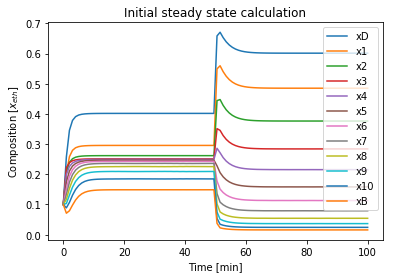

In [52]:
plt.figure(1)
plt.title("Initial steady state calculation")
plt.plot(t,x0s, label = "xD")
plt.plot(t,x1s, label = "x1")
plt.plot(t,x2s, label = "x2")
plt.plot(t,x3s, label = "x3")
plt.plot(t,x4s, label = "x4")
plt.plot(t,x5s, label = "x5")
plt.plot(t,x6s, label = "x6")
plt.plot(t,x7s, label = "x7")
plt.plot(t,x8s, label = "x8")
plt.plot(t,x9s, label = "x9")
plt.plot(t,x10s, label = "x10")
plt.plot(t,x11s, label = "xB")
plt.xlabel("Time [min]")
plt.ylabel("Composition [$x_{eth}$]")
plt.legend(loc = "upper right")
print(x0s[-1],x11s[-1])

# Consistency plot of model

The idea to assume CMO and constant hold up creates a scenario where mass is "created" to fulfill both the criterias. The plot below will show that there accumulation occuring in the column increases yet the mass balance decreases to zero. These two are thus contradictory because the mass balance should produce the exact same accumulation.

The mass balance is calculated as follows:

$M_{t}\frac{dx_t}{dt} = x_FF -x_BB - x_DD$

And the accumulation is calculated as follows:

$M_{t}\frac{dx_t}{dt} = \sum{M_i\frac{dx_i}{dt}}$

where 
- $M_t$ is the total mass accumulated in the column
- $x_t$ is the mole fraction of the mass in the column
- $M_i$ is the total mass accumulated on each tray $i$.

In [ ]:
D = D_F_ratio*(F3+F7)
L1 = reflux*D
V = L1 + D
L2 = F3 + L1
L3 = F7 + L2

moles_inside_column_at_zero = (x0s[0]*m_cond+x1s[0]*m_tray+x2s[0]*m_tray+x3s[0]*m_tray+x4s[0]*m_tray+x5s[0]*m_tray+x6s[0]*m_tray+
                       x7s[0]*m_tray+x8s[0]*m_tray+x9s[0]*m_tray+x10s[0]*m_tray+x11s[0]*m_rebl)

# This calculated the accumulation insie the column through summing the accumulation on each plate
moles_inside_column = (x0s*m_cond+x1s*m_tray+x2s*m_tray+x3s*m_tray+x4s*m_tray+x5s*m_tray+x6s*m_tray+
                       x7s*m_tray+x8s*m_tray+x9s*m_tray+x10s*m_tray+x11s*m_rebl) - moles_inside_column_at_zero

# This calculates the accumlation in the column through the mass balance
mole_balance = xF*F3 - (D)*(x0s)- (L3-V)*x11s - 0.1*10*m_tray - 0.1*m_cond - 0.1*m_rebl
diff = moles_inside_column - mole_balance

integral = []
for i in range(1,len(t)+1):
    dMtxtdt = xF*F3 - (D)*(x0s[0:i])- (L3-V)*x11s[0:i]
    integral.append(np.trapz(dMtxtdt,t[0:i]))

plt.figure(1)
plt.title("Consistency Plot")
plt.xlabel("Time")
plt.ylabel("Accumulation of mass")
plt.plot(t,integral, label = "Mole balance")
plt.plot(t,moles_inside_column, label = "Diff equations")
plt.legend(loc="best")
plt.savefig("consistency_plot.png")
plt.figure(2)
plt.plot(t,moles_inside_column-integral, label = "Error")
plt.savefig("consistency_plot_error.png")

## Reflux ratio step

The reflux ratio is stepped with a factor of 2.

In [ ]:
tspan = (0, 10)
t = np.linspace( *tspan, 10000)
reflux = 0.8*3 
reflux_step = scipy.integrate.solve_ivp(mod, tspan, xi, t_eval=t)
x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11 = reflux_step.y

In [ ]:
xi = [x0[-1],x1[-1],x2[-1],x3[-1],x4[-1],x5[-1],x6[-1],x7[-1],x8[-1],x9[-1],x10[-1],x11[-1]]

In [ ]:
plt.figure(2)
plt.title("Reflux step test")
plt.plot(t,x0, label = "xD")
plt.plot(t,x1, label = "x1")
plt.plot(t,x2, label = "x2")
plt.plot(t,x3, label = "x3")
plt.plot(t,x4, label = "x4")
plt.plot(t,x5, label = "x5")
plt.plot(t,x6, label = "x6")
plt.plot(t,x7, label = "x7")
plt.plot(t,x8, label = "x8")
plt.plot(t,x9, label = "x9")
plt.plot(t,x10, label = "x10")
plt.plot(t,x11, label = "xB")
plt.xlabel("Time [min]")
plt.ylabel("Composition [$x_{eth}$]")
plt.legend(loc = "upper right")
plt.savefig('Feed_step2.svg')

## Feed flow rate step

The feed rate on plate 3 is stepped with a factor of 20.

In [ ]:
tspan = (0, 10)
t = np.linspace( *tspan, 10000)
reflux = 0.8
F3 = F3*3
feed_step = scipy.integrate.solve_ivp(mod, tspan, xi, t_eval=t)
x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11 = feed_step.y

In [ ]:
plt.figure(3)
plt.title("Feed flow rate step")
plt.plot(t,x0, label = "xD")
plt.plot(t,x1, label = "x1")
plt.plot(t,x2, label = "x2")
plt.plot(t,x3, label = "x3")
plt.plot(t,x4, label = "x4")
plt.plot(t,x5, label = "x5")
plt.plot(t,x6, label = "x6")
plt.plot(t,x7, label = "x7")
plt.plot(t,x8, label = "x8")
plt.plot(t,x9, label = "x9")
plt.plot(t,x10, label = "x10")
plt.plot(t,x11, label = "xB")
plt.xlabel("Time [min]")
plt.ylabel("Composition [$x_{eth}$]")
plt.legend(loc = "upper right")
plt.savefig('Feed_step2.svg')

## Feed compositon step

The feed on plate 3 is stepped by a factor of 2.

In [ ]:
tspan = (0, 10)
t = np.linspace( *tspan, 100)
F3 = 1
xF = xF*2
composition_step = scipy.integrate.solve_ivp(mod, tspan, xi, t_eval=t)
x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11 = composition_step.y

In [ ]:
plt.figure('twxt')
plt.title("Feed composition step")
plt.plot(t,x0, label = "xD")
plt.plot(t,x1, label = "x1")
plt.plot(t,x2, label = "x2")
plt.plot(t,x3, label = "x3")
plt.plot(t,x4, label = "x4")
plt.plot(t,x5, label = "x5")
plt.plot(t,x6, label = "x6")
plt.plot(t,x7, label = "x7")
plt.plot(t,x8, label = "x8")
plt.plot(t,x9, label = "x9")
plt.plot(t,x10, label = "x10")
plt.plot(t,x11, label = "xB")
plt.xlabel("Time [min]")
plt.ylabel("Composition [$x_{eth}$]")
plt.legend(loc = "upper right")

## Distillate to feed ratio step

The distillate to feed ratio is stepped by a factor of 2.

In [ ]:
tspan = (0, 10)
t = np.linspace( *tspan, 100)
xF = 0.25
D_F_ratio = D_F_ratio*0.8
d_f_ratio_step = scipy.integrate.solve_ivp(mod, tspan, xi, t_eval=t)
x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11 = d_f_ratio_step.y

In [ ]:
plt.figure('Distillate_feed_step')
plt.title("Distillate to feed ratio step")
plt.plot(t,x0, label = "xD")
plt.plot(t,x1, label = "x1")
plt.plot(t,x2, label = "x2")
plt.plot(t,x3, label = "x3")
plt.plot(t,x4, label = "x4")
plt.plot(t,x5, label = "x5")
plt.plot(t,x6, label = "x6")
plt.plot(t,x7, label = "x7")
plt.plot(t,x8, label = "x8")
plt.plot(t,x9, label = "x9")
plt.plot(t,x10, label = "x10")
plt.plot(t,x11, label = "xB")
plt.xlabel("Time [min]")
plt.ylabel("Composition [$x_{eth}$]")
plt.legend(loc = "upper right")